In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
#Approval Rating Data 
Presidents = ["Donald Trump","Barack Obama","George W. Bush", "William J. Clinton",
              "George Bush", "Ronald Reagan", "Jimmy Carter", "Gerald R. Ford", "Richard Nixon"]
filepath = "../Data/Cleaned President Ratings/"
Approval_Ratings = pd.DataFrame()
for i in range(len(Presidents)):
    Approval_Rating = pd.read_csv(f"{filepath}{Presidents[i]}-Ratings.csv")
    Approval_Ratings = pd.concat([Approval_Ratings,Approval_Rating],ignore_index = True)

Approval_Ratings.head()    

,Start Date,End Date,Approving,Disapproving,Unsure/NoData,Year,Month
0,10/08/2018,2018-10-14,44,51,5,2018,10
1,10/01/2018,2018-10-07,43,53,4,2018,10
2,09/24/2018,2018-09-30,42,53,5,2018,9
3,09/17/2018,2018-09-23,40,56,4,2018,9
4,09/10/2018,2018-09-16,38,56,6,2018,9


In [3]:
#Crime Data
crime_file = "../Data/Crime_in_USA_1960-2018.csv"
crime_df = pd.read_csv(crime_file,encoding="ISO-8859-1")
crime_df.columns = ["Year","Population","Total", "Violent","Property","Murder","Forcible_Rape",
                    "Robbery","Aggravated_Assault","Burglary","Larceny_Theft","Vehicle_Theft"]
crime_df.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_Assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [4]:
#Preping the Crime Data
crime_df["Year"] = [crime_df["Year"][i].strip('\xa0') for i in range(len(crime_df["Year"]))]
crime_df = crime_df.reset_index()
crime_df.Property = crime_df.Property.astype(int)
crime_df.Robbery = crime_df.Robbery.astype(int)
crime_df.Burglary = crime_df.Burglary.astype(int)
crime_df.Larceny_Theft = crime_df.Larceny_Theft.astype(int)
crime_df.Vehicle_Theft = crime_df.Vehicle_Theft.astype(int)
crime_df.Aggravated_Assault = crime_df.Aggravated_Assault.astype(int)
crime_df.Murder = crime_df.Murder.astype(int)
crime_df.Year = crime_df.Year.astype(int)

#Preping the Approval Rating
Year_approval_average  = Approval_Ratings.groupby(["Year"]).mean()["Approving"]
Approval_average_list = [ round(Year_approval_average[1969+i],1) for i in range(len(Year_approval_average))]
approval = Year_approval_average.reset_index()

#Corr
Corr_chart = pd.concat([crime_df,approval],axis = 1).drop(columns=['Year','index']).corr()
corr_list = Corr_chart.sort_values("Approving")
corr_list["Approving"]

Aggravated_Assault    0.149080
Larceny_Theft         0.205932
Vehicle_Theft         0.253576
Property              0.269839
Robbery               0.360372
Burglary              0.382646
Murder                0.419875
Approving             1.000000
Name: Approving, dtype: float64

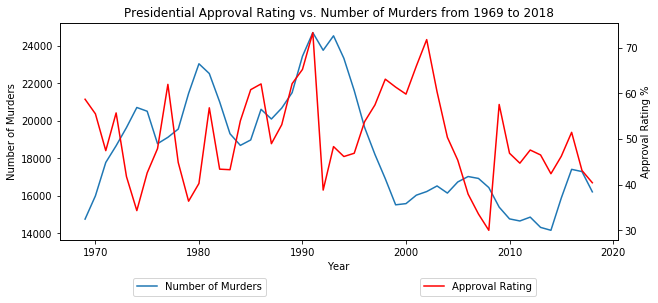

In [5]:
Fig = plt.figure(figsize = (10,4))

ax1 = Fig.add_subplot()
ax1.plot(crime_df["Year"][9:],crime_df["Murder"][9:],label = "Number of Murders");
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Murders");
ax1.set_title("Presidential Approval Rating vs. Number of Murders from 1969 to 2018");
ax1.legend(loc='upper center', bbox_to_anchor=(0.25, -0.15));
ax2 = ax1.twinx()
ax2.plot(crime_df["Year"][9:],approval["Approving"],color = "red",label = "Approval Rating")
ax2.set_ylabel("Approval Rating %");
ax2.legend(loc='upper center', bbox_to_anchor=(0.75, -0.15));

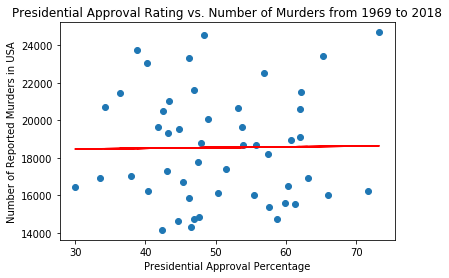

In [6]:
x = np.array(approval["Approving"]).reshape((-1,1))
y = np.array(crime_df["Murder"][9:])
model = LinearRegression().fit(x,y)
r = model.score(x,y)
y_int = model.intercept_
slope = model.coef_[0]
f = [slope*i + y_int for i in approval["Approving"]]

plt.scatter(approval["Approving"],crime_df["Murder"][9:]);
plt.title("Presidential Approval Rating vs. Number of Murders from 1969 to 2018");
plt.xlabel("Presidential Approval Percentage");
plt.ylabel("Number of Reported Murders in USA");
plt.plot(approval["Approving"],f,color = "red")
plt.show()


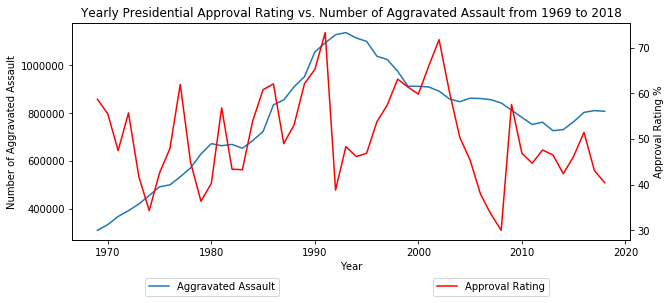

In [7]:
Fig2 = plt.figure(figsize = (10,4))

ax3 = Fig2.add_subplot()
ax3.plot(crime_df["Year"][9:],crime_df["Aggravated_Assault"][9:],label = "Aggravated Assault");
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of Aggravated Assault");
ax3.set_title("Yearly Presidential Approval Rating vs. Number of Aggravated Assault from 1969 to 2018");
ax3.legend(loc='upper center', bbox_to_anchor=(0.25, -0.15))
ax4 = ax3.twinx()
ax4.plot(crime_df["Year"][9:],approval["Approving"],color = "red",label = "Approval Rating")
ax4.set_ylabel("Approval Rating %");
ax4.legend(loc='upper center', bbox_to_anchor=(0.75, -0.15));


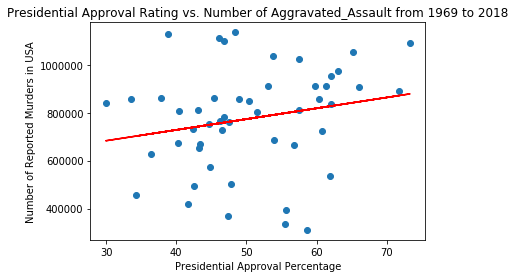

0.04401442710786596


In [12]:
x = np.array(approval["Approving"]).reshape((-1,1))
y = np.array(crime_df["Aggravated_Assault"][9:])
model = LinearRegression().fit(x,y)
r = model.score(x,y)
y_int = model.intercept_
slope = model.coef_[0]
f = [slope*i + y_int for i in approval["Approving"]]

plt.scatter(approval["Approving"],crime_df["Aggravated_Assault"][9:]);
plt.title("Presidential Approval Rating vs. Number of Aggravated_Assault from 1969 to 2018");
plt.xlabel("Presidential Approval Percentage");
plt.ylabel("Number of Reported Murders in USA");
plt.plot(approval["Approving"],f,color = "red")
plt.show()
print(r)

In [9]:
change_years = [2017,2013,2009,2005,2001,1997,1993,1989,1985,1981,1977,1973]
change = [0,1,1,0,0,1,0,1,0,1,0,1]
change_years.reverse()

In [10]:
Year_disapproval_average = Approval_Ratings.groupby(["Year"]).mean()["Disapproving"]
Approval_average_list = [ round(Year_approval_average[1969+i],1) for i in range(len(Year_approval_average))]
Disapproval_average_list =[ round(Year_disapproval_average[1969+i],1) for i in range(len(Year_disapproval_average))]

FYAL = []
four_year_average = Approval_average_list[1]
for i in range(len(Year_approval_average)-1):
#print(i)
    if i == 0:
        pass
    else:
        if i%4 == 0:
            FYAL.append(round(four_year_average/4,1))
            four_year_average = Approval_average_list[i+1]
#print(FYAL)
        else:
            four_year_average += Approval_average_list[i+1]



In [11]:
changes = pd.DataFrame({'Year':change_years,'Approval Rating':FYAL,'Change':change},columns = ["Year","Approval Rating","Change"])
print(changes)
changes = changes.drop(columns = ["Year"]).corr()

changes

    Year  Approval Rating  Change
0   1973             50.1       0
1   1977             46.7       1
2   1981             44.5       1
3   1985             50.3       0
4   1989             56.6       0
5   1993             56.4       1
6   1997             51.1       0
7   2001             62.6       1
8   2005             56.9       0
9   2009             39.8       1
10  2013             46.4       0
11  2017             45.8       1


,Approval Rating,Change
Approval Rating,1.000000,-0.209139
Change,-0.209139,1.000000
